In [1]:
import time

import numpy as np

import galsim
rng = galsim.BaseDeviate(1234)  # Seed the random number generator

In [2]:
# Assemble atmosphere parameters.
# Here we mimic the atmosphere used in Jee+Tyson (2011).

altitude = [0, 2.58, 5.16, 7.73, 12.89, 15.46]  # kilometers
# Fried parameter at 500 nm
r0_500_effective = 0.16  # meters
weights = [0.652, 0.172, 0.055, 0.025, 0.074, 0.022]  # Turbulence weights for each layer.
#  Split up the "effective" Fried parameter of the complete set of layers into
#  Fried parameters for each layer according to each layer's weight.
r0_500 = [r0_500_effective * w**(-3./5) for w in weights]
L0 = 25.0  # Outer scale in meters.
ud = galsim.UniformDeviate(rng)
speed = [ud()*20 for i in xrange(6)]  # Wind speed between 0 and 20 meters/second
direction = [ud()*360*galsim.degrees for i in xrange(6)]  # Random wind direction
screen_scale = r0_500_effective  # Use r0 as the sampling scale for the phase screens
npix = 8192  # 8192 * 0.16 m = 1.3 km; big enough to hold entire LSST FOV at 15.46 km
time_step = 0.005 # seconds

In [3]:
# Create the atmosphere

t0 = time.time()
atm = galsim.Atmosphere(r0_500=r0_500, L0=L0, time_step=time_step, altitude=altitude, 
                        speed=speed, direction=direction,
                        screen_scale=screen_scale, screen_size=screen_scale*npix)
print "Creating atmosphere took {} seconds".format(time.time()-t0)

Creating atmosphere took 205.624112844 seconds


In [4]:
# Assemble theta_x and theta_y lists to specify field angles at which to make PSFs.
# Here we make a 3x3 grid of PSFs spaced 1-degree apart.
theta_x = theta_y = np.linspace(-1, 1, 3)
theta_x, theta_y = np.meshgrid(theta_x, theta_y)
theta_x = [tx*galsim.degrees for tx in theta_x.flat]
theta_y = [ty*galsim.degrees for ty in theta_y.flat]

In [5]:
# Make 15 sec exposure time PSFs

t0 = time.time()
psfs = atm.makePSF(diam=8.4, exptime=15.0, theta_x=theta_x, theta_y=theta_y)
print "Drawing PSFs took {} seconds".format(time.time() - t0)

Drawing PSFs took 1163.06127191 seconds


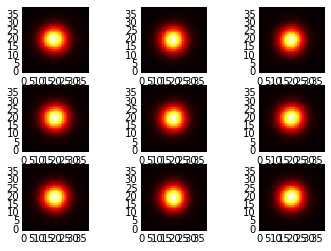

In [9]:
# Plot em

import matplotlib.pyplot as plt
%matplotlib inline
f, axes = plt.subplots(3, 3)
for psf, ax in zip(psfs, axes.flat):
    ax.imshow(psf.drawImage(nx=40, ny=40, scale=0.05).array)
plt.show()

In [10]:
# Short exposure time PSFs are more interesting to look at.
# Note that these PSFs will start with the state of the atmosphere at the end of the previous
# call to makePSF, so at t=15 seconds.

t0 = time.time()
psfs = atm.makePSF(diam=8.4, exptime=0.005, theta_x=theta_x, theta_y=theta_y)
print "Drawing PSFs took {} seconds".format(time.time() - t0)

Drawing PSFs took 0.866219997406 seconds


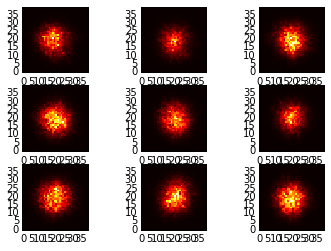

In [11]:
# Plot em

import matplotlib.pyplot as plt
%matplotlib inline
f, axes = plt.subplots(3, 3)
for psf, ax in zip(psfs, axes.flat):
    ax.imshow(psf.drawImage(nx=40, ny=40, scale=0.05).array)
plt.show()